In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



# Importing Dataset

In [3]:
df = pd.read_csv('Fraud Detection.csv')
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig   
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36  \
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# Data Wrangling

In [3]:
## Finding Null Values in each column

print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [4]:
### Finding Unique values in each column

for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

step
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 2

In [ ]:
## From above, we can see there are no missing values. The values present in each columns are of similar scales.

In [6]:
##Finding unique values in column "type"

df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [5]:
## Convert it to the Integer as the model cant understand string values
df_1 = df.copy(deep = True)

df_1['type'].replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
                     ,value = [0,1,2,3,4],inplace=True)
print(df_1.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig   
0     1     0   9839.64  C1231006815       170136.0       160296.36  \
1     1     0   1864.28  C1666544295        21249.0        19384.72   
2     1     1    181.00  C1305486145          181.0            0.00   
3     1     2    181.00   C840083671          181.0            0.00   
4     1     0  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [7]:
## Remove columns- nameOrig & nameDest since it is a String data.

df_2 = df_1.copy(deep = True)
df_2 = df_2.drop(['nameOrig','nameDest'], axis=1)

print(df_2.head())


   step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest   
0     1     0   9839.64       170136.0       160296.36             0.0  \
1     1     0   1864.28        21249.0        19384.72             0.0   
2     1     1    181.00          181.0            0.00             0.0   
3     1     2    181.00          181.0            0.00         21182.0   
4     1     0  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


In [8]:
print(df_2.shape)

(6362620, 9)


In [9]:
## Removing Outliers
from sklearn.preprocessing import LabelEncoder
Qu5 = df_2['amount'].quantile(0.5)
Qu95 = df_2['amount'].quantile(0.95)
df_2 = df_2[(df_2['amount'] > Qu5) & (df_2['amount'] < Qu95)]
print(df_2.shape)


(2863179, 9)


In [10]:

df_2['balance_differ'] = df_2['oldbalanceOrg'] - df_2['newbalanceOrig']
df_2['dest_differ']   = df_2['oldbalanceDest'] - df_2['newbalanceDest']
print(df_2.head())


    step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest   
15     1     2  229133.94       15325.00             0.0          5083.0  \
19     1     1  215310.30         705.00             0.0         22425.0   
24     1     1  311685.89       10835.00             0.0          6267.0   
42     1     2  110414.71       26845.41             0.0        288800.0   
60     1     2   82940.31        3017.87             0.0        132372.0   

    newbalanceDest  isFraud  isFlaggedFraud  balance_differ  dest_differ  
15        51513.44        0               0        15325.00    -46430.44  
19            0.00        0               0          705.00     22425.00  
24      2719172.89        0               0        10835.00  -2712905.89  
42         2415.16        0               0        26845.41    286384.84  
60        49864.36        0               0         3017.87     82507.64  


In [59]:
## Find correlation with Target variable
cor = df_2.corr()
print(cor) 

                    step      type    amount  oldbalanceOrg  newbalanceOrig   
step            1.000000  0.010506 -0.018722      -0.004717       -0.004088  \
type            0.010506  1.000000 -0.083137       0.453194        0.477628   
amount         -0.018722 -0.083137  1.000000      -0.040626       -0.033149   
oldbalanceOrg  -0.004717  0.453194 -0.040626       1.000000        0.999337   
newbalanceOrig -0.004088  0.477628 -0.033149       0.999337        1.000000   
oldbalanceDest  0.031687  0.006432  0.040464       0.043895        0.044447   
newbalanceDest  0.025217 -0.042110  0.055664       0.017500        0.016611   
isFraud         0.028650 -0.034191  0.009336      -0.009313       -0.011911   
isFlaggedFraud  0.002198 -0.001279  0.001271       0.000997        0.000969   
balance_differ -0.014257 -0.798619 -0.175349      -0.368031       -0.401633   
dest_differ     0.071527  0.549276 -0.174312       0.296461        0.312757   

                oldbalanceDest  newbalanceDest   is

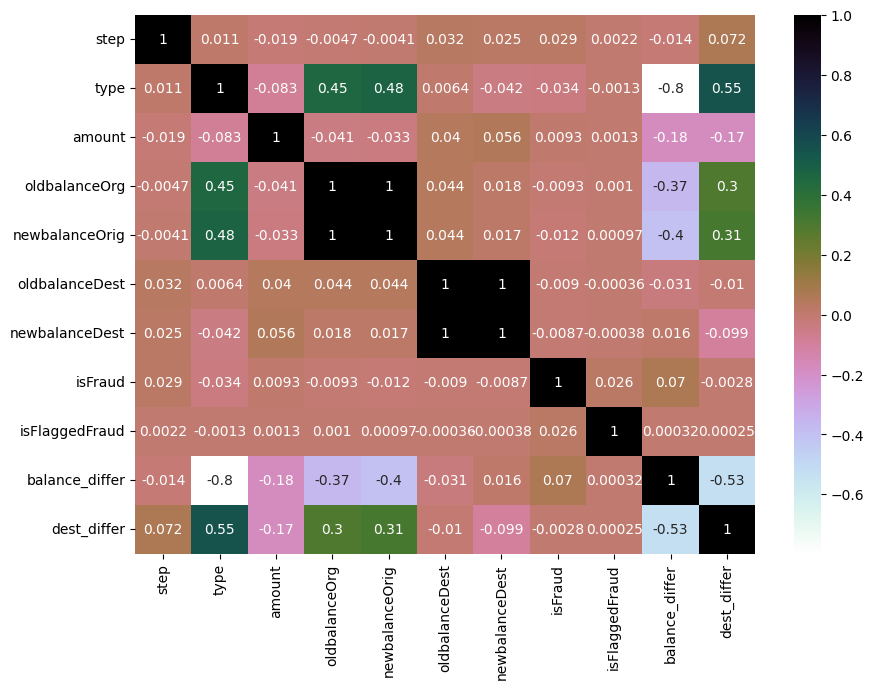

In [60]:
# Feature Selection

plt.figure(figsize=(10,7))
sns.heatmap(df_2.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [12]:
#Correlation with output variable

cor = df_2.corr()
cor_target = abs(cor["isFraud"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.005]
print(relevant_features)                   

step              0.028650
type              0.034191
amount            0.009336
oldbalanceOrg     0.009313
newbalanceOrig    0.011911
oldbalanceDest    0.008970
newbalanceDest    0.008679
isFraud           1.000000
isFlaggedFraud    0.025789
balance_differ    0.069948
Name: isFraud, dtype: float64


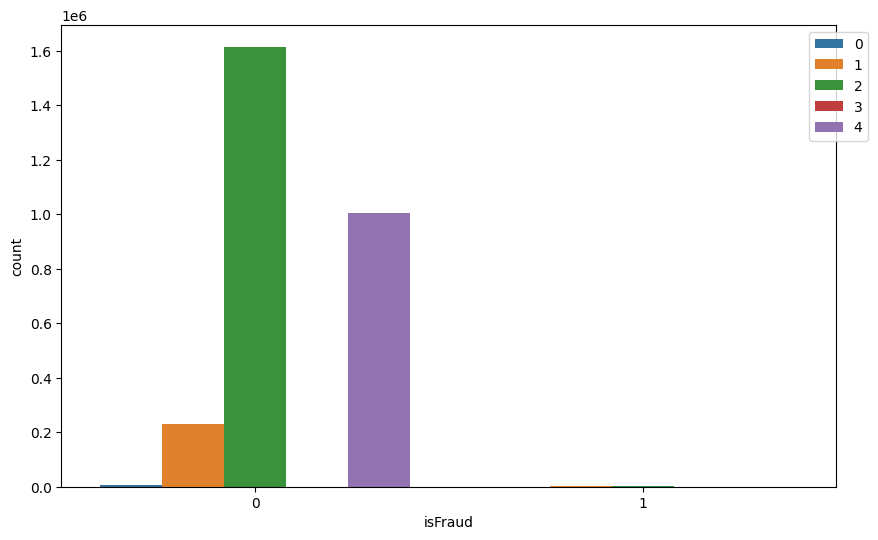

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', hue='type', data=df_2)
plt.legend(bbox_to_anchor=(1.05,1))

In [ ]:
## It shows that there are more fraudulent transactions in quantity through Cash-Out and Cash-In type.

<Axes: xlabel='isFraud', ylabel='count'>

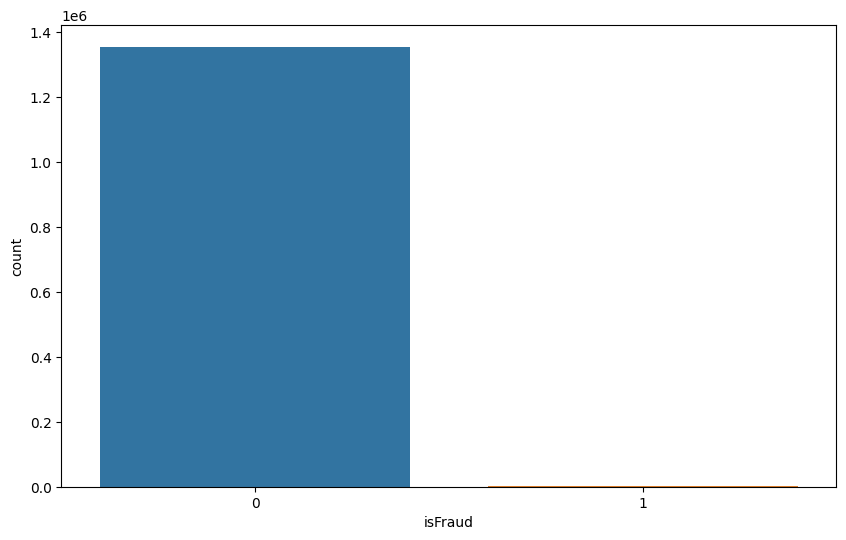

In [64]:


dataset_trans_over_two_lakh = df_2[df_2['amount'] > 200000]
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', data=dataset_trans_over_two_lakh)


In [ ]:
## Almost all transactions over $ 200,000.00 are fraudulent



In [66]:
dataset_new_bal_is_zero = df_2[df_2['newbalanceOrig']==0]
dataset_new_bal_not_zero = df_2[df_2['newbalanceOrig']!=0]
print('When new balance is zero:', dataset_new_bal_is_zero['isFraud'].value_counts() )
print('When new balance is not zero:', dataset_new_bal_not_zero['isFraud'].value_counts() )

When new balance is zero: isFraud
0    1732670
1       3002
Name: count, dtype: int64
When new balance is not zero: isFraud
0    1127505
1          2
Name: count, dtype: int64


In [ ]:
## That means there is more chance of having a fraudulent transaction when the new origin's balance is zero

# ML Model

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = df_2[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','balance_differ']]
y = df_2['isFraud']
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balance_differ
15,2,229133.94,15325.00,0.0,5083.0,51513.44,15325.00
19,1,215310.30,705.00,0.0,22425.0,0.00,705.00
24,1,311685.89,10835.00,0.0,6267.0,2719172.89,10835.00
42,2,110414.71,26845.41,0.0,288800.0,2415.16,26845.41
60,2,82940.31,3017.87,0.0,132372.0,49864.36,3017.87


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35)
classifier = linear_model.LogisticRegression(C = 1e5)
classifier.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [19]:
y_pred = np.array(classifier.predict(X_test))
y = np.array(y_test)

# Performance Evaluation

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y, y_pred))

[[1001025      46]
 [    518     524]]


In [ ]:
# calculating the performance of the model by accuracy score
print('Accuracy score: ',accuracy_score(y, y_pred))

In [22]:
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1001071
           1       0.92      0.50      0.65      1042

    accuracy                           1.00   1002113
   macro avg       0.96      0.75      0.82   1002113
weighted avg       1.00      1.00      1.00   1002113



In [ ]:
What are the key factors that predict fraudulent customer?

## The key factors that predict fraudulent transactions are type of transaction and new balance origin variables.

In [ ]:
Do these factors make sense? If yes, How? If not, How not?

##   These factors make sense because new balance origin is zero,it  indicates that these 
##   accounts are mainly used for these kind of frauds.

In [ ]:
What kind of prevention should be adopted while company update its infrastructure?

## The company needs to have a good auditing system and auditing team should take into account of the
## findings about the factors that play main role in frauds.

In [ ]:
Assuming these actions have been implemented, how would you determine if they work?

## I believe if these actions were implemented, it will lead to reduction in fraudulent transactions.